In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [19]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
X, y = fetch_california_housing(return_X_y = True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

As we have seen earlier, the feature scales for this dataset varies widely. Since KNN involves distance compuations, it is crucial to convert them to similar scales.

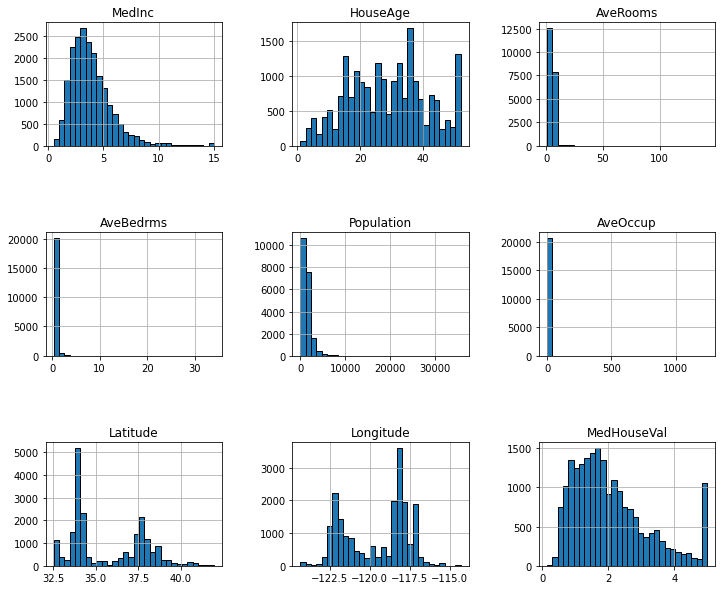

In [21]:
california_housing = fetch_california_housing(as_frame = True)
california_housing.frame.hist(figsize = (12, 10), bins = 30, edgecolor = 'black')
plt.subplots_adjust(hspace = 0.7, wspace = 0.4)

features are on different scale so we need to apply scaling before training KNN. 
> If features are not on the same scale then features with wider distance will dominate

#### Model building

In [4]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=2))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

error = mean_squared_error(y_test, y_pred, squared=False)
print(error)

0.6767822465759739


#### Model selection and evaluation
Manual HPT with cross validation

In [5]:
rmse_val = []
for k in range(1, 31):
    pipe = Pipeline([('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=k))])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    error = mean_squared_error(y_test, y_pred, squared=False)
    rmse_val.append(error)

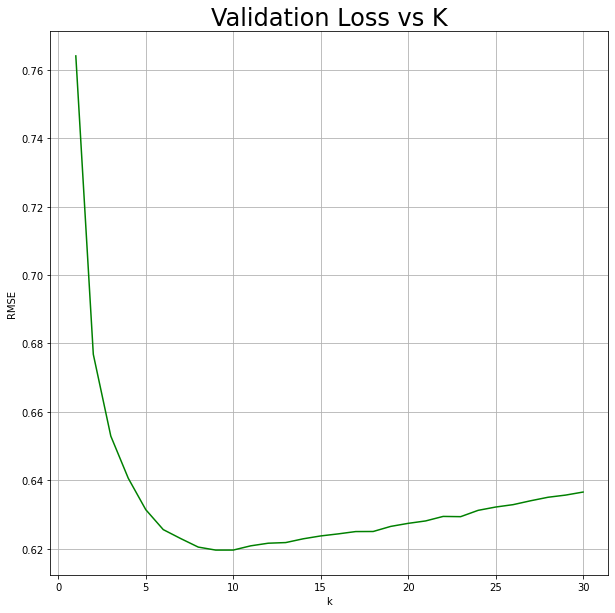

In [6]:
plt.figure(figsize=(10, 10))

plt.plot(range(1, len(rmse_val) + 1), rmse_val, color='green')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.grid('True')

plt.title("Validation Loss vs K", fontsize=24)
plt.show()

In [7]:
print("Lowest RMSE value comes from k = {}".format(np.argmin(rmse_val) + 1))

Lowest RMSE value comes from k = 9


HPT with `GridSearchCV`

In [8]:
param_grid = {'knn__n_neighbors': list(range(1, 31))}

pipe = Pipeline([('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor())])

grid_search = GridSearchCV(estimator=pipe,
                            param_grid=param_grid,
                            cv=10, n_jobs=-1,
                            return_train_score=True)

grid_search.fit(X_train, y_train)

reg_knn = grid_search.best_estimator_
print(reg_knn)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])


In [9]:
pred = reg_knn.predict(X_test)
error = mean_squared_error(y_test, y_pred, squared=False)
print(error)

0.6365126933355182


`Polynomial features`

In [10]:
param_grid = {'poly__degree': list(range(1,4)),
              'knn__n_neighbors': list(range(6, 12))}

pipe = Pipeline([('poly', PolynomialFeatures()),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor())])

grid_search = GridSearchCV(estimator=pipe,
                            param_grid=param_grid,
                            cv=10, n_jobs=-1,
                            return_train_score=True)

grid_search.fit(X_train, y_train)

reg_knn = grid_search.best_estimator_
print(reg_knn)

c:\Users\Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Computer\AppData\Local\Programs\Python\Python310\lib\site-p

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])


c:\Users\Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.70620121 0.67400673 0.6546267  0.70567369 0.67758329        nan
 0.70561397        nan        nan 0.70556076        nan        nan
 0.70451409        nan        nan 0.70457696        nan        nan]
  warnings.warn(
c:\Users\Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.79203767        nan        nan 0.7821022         nan        nan
 0.77363817        nan        nan 0.76687003        nan        nan
        nan        nan        nan 0.75552877        nan        nan]
  warnings.warn(


In [11]:
pred = reg_knn.predict(X_test)
error = mean_squared_error(y_test, y_pred, squared=False)
print(error)

0.6365126933355182
